# Lab3 Neural Networks for Handwritten Digit Recognition (Binary)

## 1 - Packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

import logging

logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## 2 - Dataset

You will start by loading the dataset for this task.

- The `load_data()` function shown below loads the data into variables `X` and `y` .
- The data set contains 1000 training examples of handwritten digits, here limited to zero and one.
  - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
    - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
    - The 20 by 20 grid of pixels is "unrolled" into a 400-dimensional vector.
    - Each training example becomes a single row in our data matrix `X` .
    - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set.
  - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

In [2]:
# Load the dataset

def load_data():
    X = np.load('X.npy')
    y = np.load('y.npy')
    X = X[0:1000]
    y = y[0:1000]
    return X, y


X, y = load_data()

In [3]:
# View the variables

print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))
print('The first element of X is:', X[0])
print('The first element of y is:', y[0, 0])
print('The last element of y is:', y[-1, 0])

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)
The first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

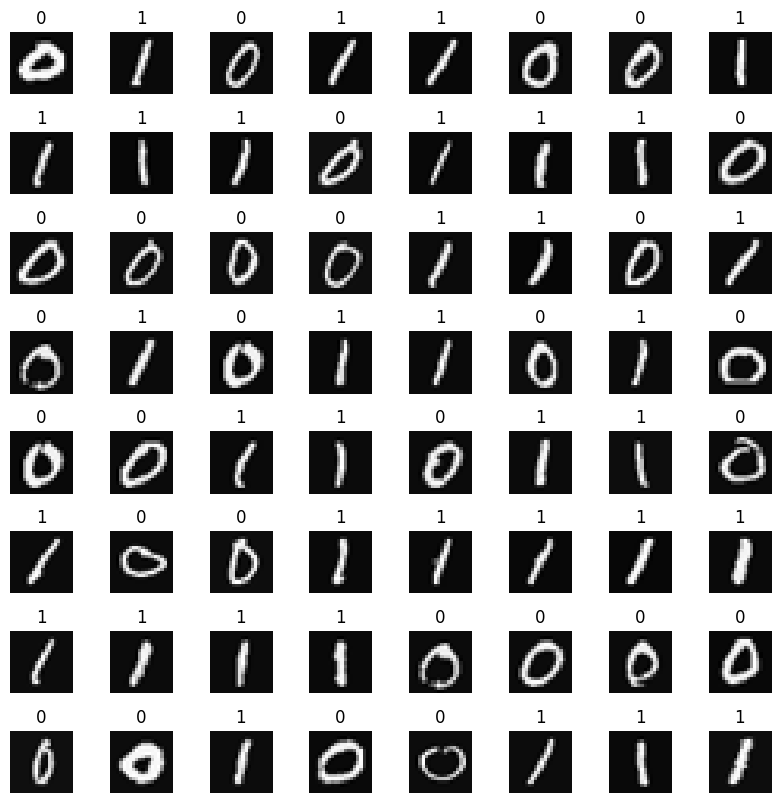

In [4]:
# Visualize the data

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

## 3 - Model Representation

The neural network you will use in this lab is below.

- This has three dense layers with sigmoid activations.
  - Recall that our inputs are pixel values of digit images.
  - Since the images are of size $20\times20$, this gives us $400$ inputs.
- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3.
  - Recall that the dimensions of these parameters are determined as follows:
    - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
    - $W$ will be of dimension $s_{in} \times s_{out}$.
    - $b$ will a vector with $s_{out}$ elements.
  - Therefore, the shapes of `W`, and `b`, are
    - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,).
    - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,).
    - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,).

> **Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention.

## 4 - Tensorflow Model Implementation

In [5]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ], name='my_model'
)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [6]:
L1_num_params = 400 * 25 + 25  # W1 parameters + b1 parameters
L2_num_params = 25 * 15 + 15  # W2 parameters + b2 parameters
L3_num_params = 15 * 1 + 1  # W3 parameters + b3 parameters

print('L1 params =', L1_num_params, ', L2 params =', L2_num_params, ', L3 params =', L3_num_params)

L1 params = 10025 , L2 params = 390 , L3 params = 16


We can examine details of the model by first extracting the layers with `model.layers` and then extracting the weights with `layerx.get_weights()` as shown below.

In [7]:
[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f'W1 shape = {W1.shape}, b1 shape = {b1.shape}')
print(f'W2 shape = {W2.shape}, b2 shape = {b2.shape}')
print(f'W3 shape = {W3.shape}, b3 shape = {b3.shape}')

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data.

In [8]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,
    y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 892us/step - loss: 0.6358
Epoch 2/20
32/32 [==============================] - 0s 781us/step - loss: 0.4754
Epoch 3/20
32/32 [==============================] - 0s 604us/step - loss: 0.3400
Epoch 4/20
32/32 [==============================] - 0s 744us/step - loss: 0.2418
Epoch 5/20
32/32 [==============================] - 0s 723us/step - loss: 0.1783
Epoch 6/20
32/32 [==============================] - 0s 795us/step - loss: 0.1369
Epoch 7/20
32/32 [==============================] - 0s 779us/step - loss: 0.1091
Epoch 8/20
32/32 [==============================] - 0s 736us/step - loss: 0.0895
Epoch 9/20
32/32 [==============================] - 0s 758us/step - loss: 0.0752
Epoch 10/20
32/32 [==============================] - 0s 820us/step - loss: 0.0642
Epoch 11/20
32/32 [==============================] - 0s 768us/step - loss: 0.0557
Epoch 12/20
32/32 [==============================] - 0s 770us/step - loss: 0.0490
Epoch 13/20
32/32 [======

To run the model on an example to make a prediction, use Keras `predict`. The input to `predict` is an array so the single example is reshaped to be two dimensional.

The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one. As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [9]:
prediction = model.predict(X[0].reshape(1, 400))  # A zero
print(f'Predicting a zero: {prediction}')

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f'Prediction after threshold: {yhat}')

prediction = model.predict(X[500].reshape(1, 400))  # A one
print(f'Predicting a one: {prediction}')

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f'Prediction after threshold: {yhat}')

1/1 [==============================] - 0s 46ms/step
Predicting a zero: [[0.01554736]]
Prediction after threshold: 0
1/1 [==============================] - 0s 11ms/step
Predicting a one: [[0.97852623]]
Prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 9ms/step


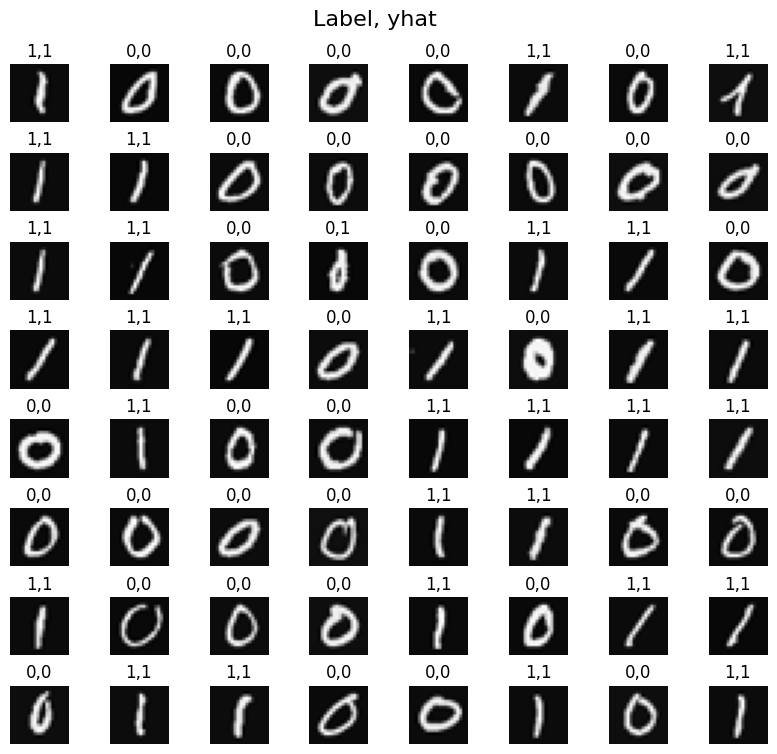

In [10]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    ax.set_title(f'{y[random_index, 0]},{yhat}')
    ax.set_axis_off()

fig.suptitle('Label, yhat', fontsize=16)
plt.show()

## 5 - NumPy Model Implementation

In [11]:
def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)

    return (a_out)

The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return (a3)

We can copy trained weights and biases from Tensorflow.

In [13]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [14]:
# Make predictions

prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print('yhat =', yhat, ', label =', y[0, 0])

prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print('yhat =', yhat, ', label =', y[500, 0])

yhat = 0 , label = 0
yhat = 1 , label = 1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model.

1/1 [==============================] - 0s 12ms/step


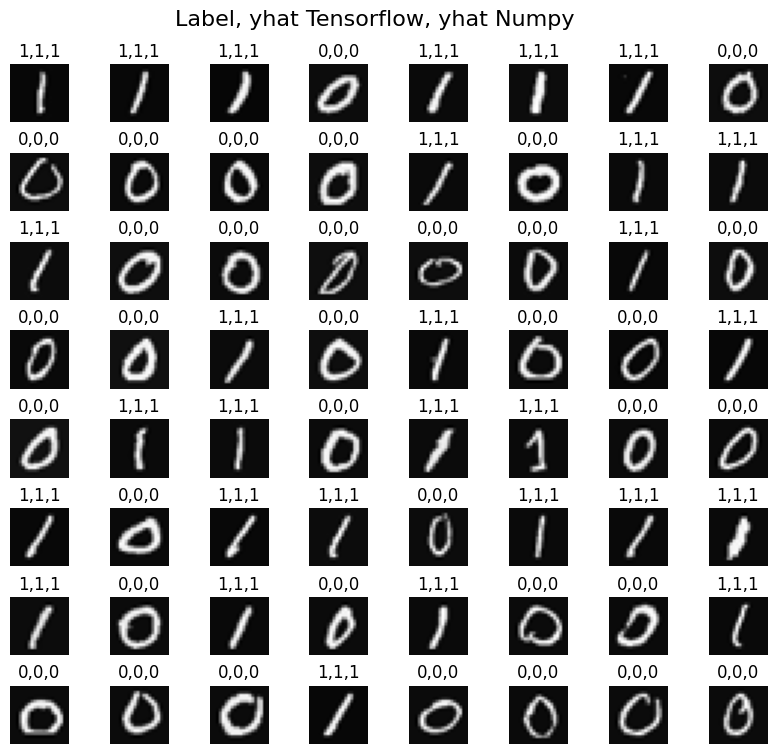

In [15]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)
    tf_prediction = model.predict(X[random_index].reshape(1, 400))
    tf_yhat = int(tf_prediction >= 0.5)
    ax.set_title(f'{y[random_index, 0]},{tf_yhat},{my_yhat}')
    ax.set_axis_off()

fig.suptitle('Label, yhat Tensorflow, yhat Numpy', fontsize=16)
plt.show()

## 6 - Vectorized NumPy Model Implementation

In [16]:
def my_dense_v(A_in, W, b, g):
    z = np.matmul(A_in, W) + b
    A_out = g(z)

    return (A_out)

The following cell builds a three-layer neural network utilizing the `my_dense_v` subroutine above.

In [17]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X, W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return A3

We can again copy trained weights and biases from Tensorflow.

In [18]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

Let's make a prediction with the new model.

In [19]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
Yhat = (Prediction >= 0.5).astype(int)
print('Predict a zero:', Yhat[0], ', Predict a one:', Yhat[500])

Predict a zero: [0] , Predict a one: [1]


Run the following cell to see predictions.

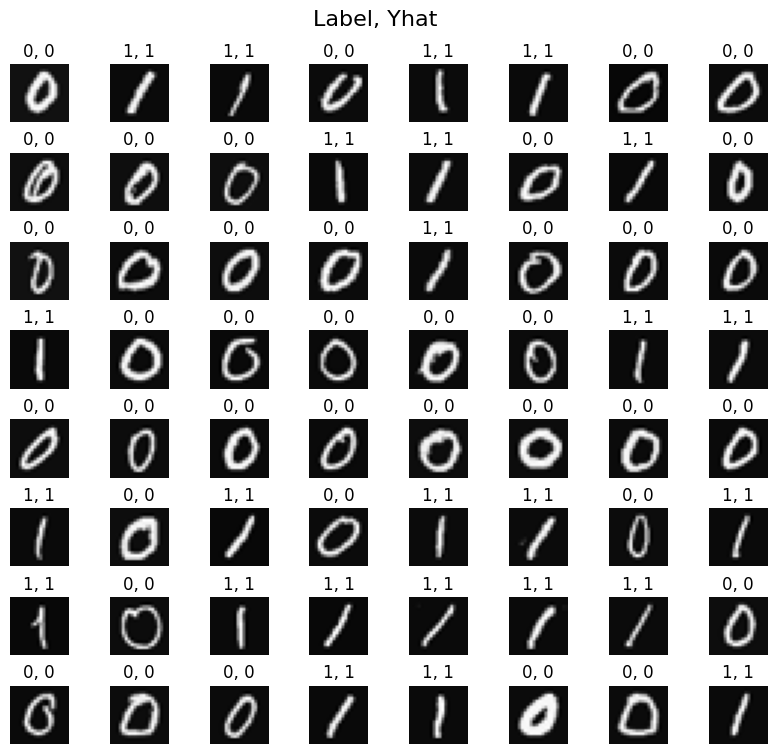

In [20]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(f'{y[random_index, 0]}, {Yhat[random_index, 0]}')
    ax.set_axis_off()

fig.suptitle('Label, Yhat', fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

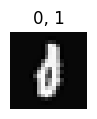

In [21]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f'{y[random_index, 0]}, {Yhat[random_index, 0]}')
plt.axis('off')
plt.show()